In [1]:
import helpers
import numpy as np
import re 

#helpers.npNicePrint(arr)

data = """p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3"""
#data = """125 17"""
with open("input_14.txt", 'r') as f:
    data = f.read()


def safe_get(grid, index):
    try:
        return grid[tuple(index)]
    except:
        return ""
    
#changeDict = {"forward": np.array([1,0]), "down": np.array([0,1]), "up": np.array([0,-1])}
#data = [changeDict[x.split(" ")[0]] * int(x.split(" ")[1]) for x in data.split("\n") if x]
#data = [
#    [int(match.group(1)), list(map(int, match.group(2).split()))]
#    for line in data.split("\n")
#    if (match := re.match(r'^(\d+):\s*(\d+(?:\s+\d+)*)', line))
#]
#np.prod(sum(data))    
#data = [list(map(int, x.split(" "))) for x in data.split('\n') if not x == ""]
#grid = {(x,y): str(val) for y, r in enumerate(data.split('\n')) for x, val in enumerate(r)}
#grid
#data = [int(x) for x in data.split(" ")]

# Parsing data
robots =[]

for line in data.splitlines():
    # Split on spaces and extract p and v values
    p, v = line.split()
    # Extract the numbers from p and v and convert to tuples
    robots.append([np.array(tuple(map(int, p[2:].split(',')))), np.array(tuple(map(int, v[2:].split(','))))])

# Print results
#print("Robots:", robots)


# Output the parsed data
#print(data)



In [19]:
from functools import reduce

moves = 100
w,h = 101,103
#p,v = robots[0]

q_w = w // 2
q_h = h // 2

quadrants = [[0,0],[0,0]]

for p,v in robots:
    new_p = p + 100*v
    #print(new_p)
    new_p[0] %= w
    new_p[1] %= h
    #print(new_p)
    #this will probably get harder in pt 2, but hard coding for now
    if new_p[0] < q_w and new_p[1] < q_h:
        quadrants[0][0] += 1
    elif new_p[0] > q_w and new_p[1] < q_h:
        quadrants[0][1] += 1
    elif new_p[0] < q_w and new_p[1] > q_h:
        quadrants[1][0] += 1
    elif new_p[0] > q_w and new_p[1] > q_h:
        quadrants[1][1] += 1
        
ans = reduce(lambda x, y: x * y, [item for sublist in quadrants for item in sublist])
ans

224554908

<IPython.core.display.Javascript object>


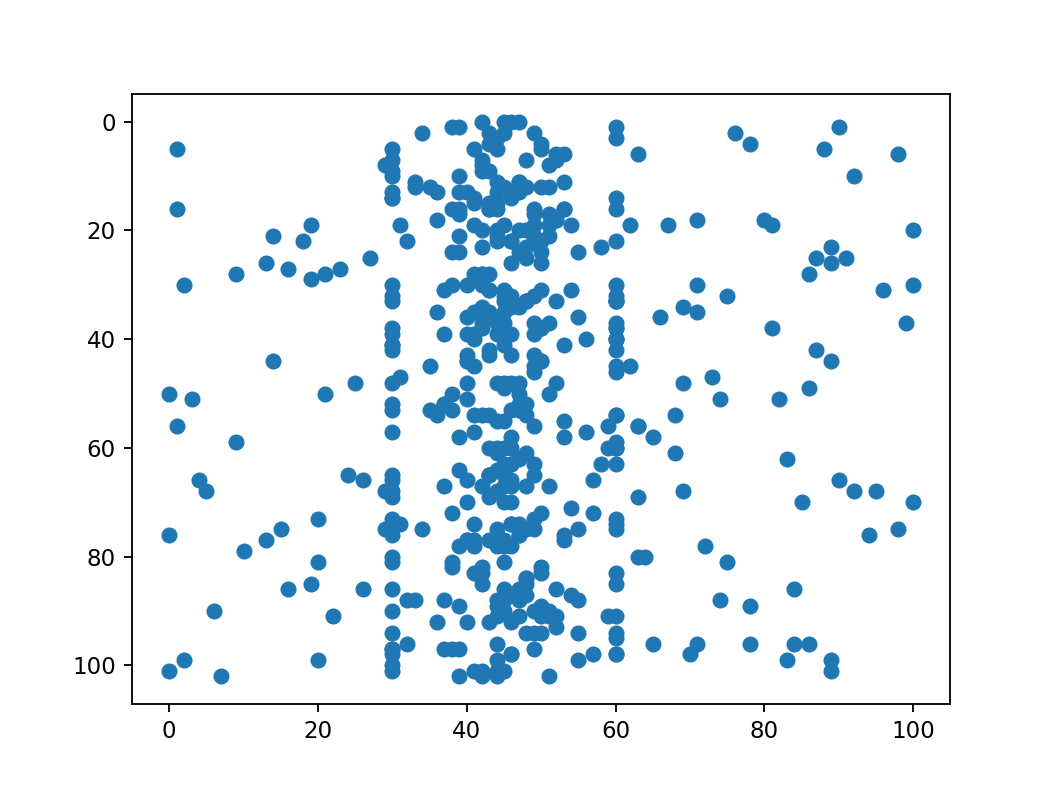

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

output_dir = "14-images"
w,h = 101,103

def transform(robots, times):
    points = []
    for i, (p,v) in enumerate(robots):
        p += times*v
        p[0] %= w
        p[1] %= h
        points.append(p)
    return points


# Set up the plot
fig, ax = plt.subplots()
ax.invert_yaxis()
points = [item[0] for item in robots]
sc = ax.scatter([p[0] for p in points], [p[1] for p in points])

timestep = 79
if timestep > 0:
    transform(robots, timestep)
times = 101
while timestep <= w*h:  # Example: 10 timesteps
    timestep += times
    # Shift points by a certain amount (e.g., move diagonally)
    points = transform(robots, times)
    #points = [item[0] for item in robots]
    sc.set_offsets(np.array(points))
    # Update the scatter object with the new positions
    #sc.set_offsets(np.array([[p[0], p[1]] for p in points]))  # Update offsets

    # Save the current plot as an image
    filename = os.path.join(output_dir, f"timestep_{timestep:03d}.png")  # e.g., timestep_000.png
    plt.savefig(filename)


In [ ]:
#answer is 6644, see images_14 folder